# Explore

### Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns

### Data Imports

In [8]:
df_track = pd.read_csv('data_clean/track.csv')
df_album = pd.read_csv('data_clean/album.csv')
df_artist = pd.read_csv('data_clean/artist.csv')
df_rating = pd.read_csv('data_clean/rating.csv')
df_similar = pd.read_csv('data_clean/track_similarity.csv')

### Functions Definitions

In [9]:
def get_artist_id(artist_name):
    return df_artist[df_artist['name'] == artist_name]['artist_id'].values[0]

def get_album_id(album_name):
    return df_album[df_album['name'] == album_name]['album_id'].values[0]

def get_track_id(track_name):
    return df_track[df_track['name'] == track_name]['track_id'].values[0]

# ====================================================

def get_all_tracks_by_artist(artist_id, only_id=False):
    return df_track[df_track['artist_id'] == artist_id] if not only_id else df_track[df_track['artist_id'] == artist_id]['track_id']

def get_all_tracks_by_album(album_id, only_id=False):
    return df_track[df_track['album_id'] == album_id] if not only_id else df_track[df_track['album_id'] == album_id]['track_id']

def get_all_albums_by_artist(artist_id, only_id=False):
    return df_album[df_album['artist_id'] == artist_id] if not only_id else df_album[df_album['artist_id'] == artist_id]['album_id']

# ====================================================

def convert_track_id_to_name(track_id):
    return df_track[df_track['track_id'] == track_id]['title'].values[0]

def convert_album_id_to_name(album_id):
    return df_album[df_album['album_id'] == album_id]['name'].values[0]

def convert_artist_id_to_name(artist_id):
    return df_artist[df_artist['artist_id'] == artist_id]['name'].values[0]

# ====================================================

def compare_track_lists_sim(track_id_list_1, track_id_list_2):

    ret_list = []

    for main_track_id in track_id_list_1:
        for other_track_id in track_id_list_2:    
            
            similarity = df_similar[(df_similar['track_id_1'] == main_track_id) & (df_similar['track_id_2'] == other_track_id)]
            
            if not similarity.empty:
                name1 = convert_track_id_to_name(main_track_id)
                name2 = convert_track_id_to_name(other_track_id)
                ret_list.append((name1, name2, float(similarity.iloc[0]["sim_degree"])))

            similarity = df_similar[(df_similar['track_id_2'] == main_track_id) & (df_similar['track_id_1'] == other_track_id)]
            
            if not similarity.empty:
                name1 = convert_track_id_to_name(main_track_id)
                name2 = convert_track_id_to_name(other_track_id)
                ret_list.append((name1, name2, float(similarity.iloc[0]["sim_degree"])))

    ret = sorted(ret_list, key=lambda x: x[2], reverse=True)
    return ret

## Ranking Sources Comparision

In [10]:
df_rating = pd.read_csv('data_clean/rating.csv')

# filter one year (take the first 4 digits of the date)
# df_rating = df_rating[df_rating['date'].str[:4] == '2013']

df_rating.head(10)

,track_id,date,position_lastfm,no_of_listeners_lastfm,position_spotify,no_of_listeners_spotify,position_billboard
0,1,2014-11-29,NaN,NaN,NaN,NaN,65.0
1,1,2014-12-06,NaN,NaN,NaN,NaN,18.0
2,1,2014-12-13,NaN,NaN,NaN,NaN,8.0
3,1,2014-12-20,NaN,NaN,NaN,NaN,5.0
4,1,2014-12-27,NaN,NaN,NaN,NaN,3.0
5,1,2015-01-03,NaN,NaN,NaN,NaN,3.0
6,1,2015-01-10,NaN,NaN,NaN,NaN,2.0
7,1,2015-01-17,NaN,NaN,NaN,NaN,1.0
8,1,2015-01-24,NaN,NaN,NaN,NaN,1.0
9,2,2014-11-02,7.0,4280.0,NaN,NaN,NaN


In [11]:
# Ensure rankings are numeric
columns_to_numeric = ['no_of_listeners_lastfm', 'no_of_listeners_spotify']
df_rating[columns_to_numeric] = df_rating[columns_to_numeric].apply(pd.to_numeric, errors='coerce')

# drop position_lastfm, position_spotify, position_billboard
df_rating = df_rating.drop(columns=['position_lastfm', 'position_spotify', 'position_billboard'])

# drop rows with NaN values
df_rating = df_rating.dropna()

# normalize rankings
# df_rating[columns_to_numeric] = df_rating[columns_to_numeric].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print('Rating dataframe shape:', df_rating.shape)
print('Number of distinct tracks:', len(df_rating['track_id'].unique()))

df_rating.head(10)

Rating dataframe shape: (2089, 4)
Number of distinct tracks: 238


,track_id,date,no_of_listeners_lastfm,no_of_listeners_spotify
44,3,2014-10-12,2576.0,1126531.0
46,3,2014-10-19,2765.0,1370227.0
48,3,2014-10-26,3329.0,1932283.0
50,3,2014-11-02,3134.0,2188326.0
52,3,2014-11-09,3352.0,2661027.0
54,3,2014-11-16,3396.0,2972893.0
56,3,2014-11-23,3515.0,3253579.0
58,3,2014-11-30,3403.0,3263508.0
60,3,2014-12-07,4253.0,3890729.0
62,3,2014-12-14,4360.0,4371969.0


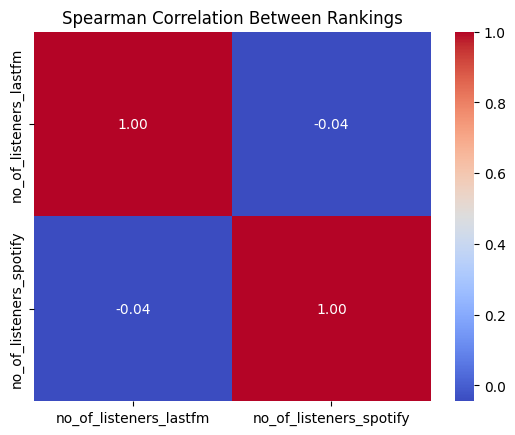

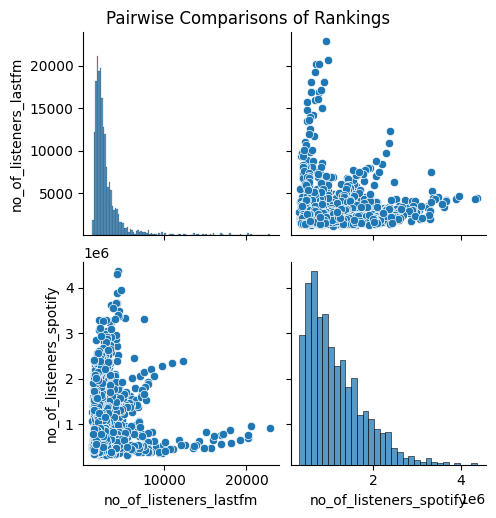

In [12]:
# Compute pairwise Spearman correlations
correlations = df_rating[columns_to_numeric].corr(method='spearman')
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Between Rankings')
plt.show()

# Scatter plots to check for relationships
sns.pairplot(df_rating, vars=columns_to_numeric)
plt.suptitle("Pairwise Comparisons of Rankings", y=1.02)
plt.show()